# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/smnvkaty/hw06/main/train.csv

--2022-05-11 16:52:12--  https://raw.githubusercontent.com/smnvkaty/hw06/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987712 (965K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 964.56K  --.-KB/s    in 0.008s  

2022-05-11 16:52:12 (122 MB/s) - ‘train.csv’ saved [987712/987712]



In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [6]:
train.isnull().values.any().any()

True

In [7]:
train.isnull().sum()

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [8]:
test.isnull().values.any().any()

True

In [9]:
test.isnull().sum()

id            0
keyword      17
location    773
text          0
target        0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
train = train[train.columns].fillna("")
test = test[test.columns].fillna("")

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [12]:
train['target'].value_counts()

0    3024
1    2305
Name: target, dtype: int64

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

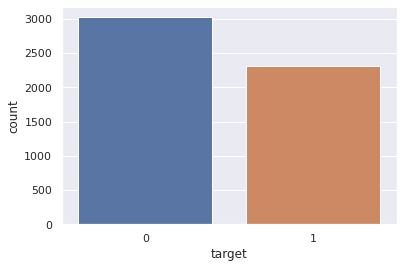

In [14]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="target", data=train)

In [15]:
print(f'Доля класса 0 в обучающей выборке: {round(train.target.value_counts()[0] / train.shape[0], 2)}')
print(f'Доля класса 1 в обучающей выборке: {round(train.target.value_counts()[1] / train.shape[0], 2)}')
print("Доля объектов 0 класса в обучающей выборке незначительно превышает долю объектов 1 класса.")

Доля класса 0 в обучающей выборке: 0.57
Доля класса 1 в обучающей выборке: 0.43
Доля объектов 0 класса в обучающей выборке незначительно превышает долю объектов 1 класса.


In [16]:
import numpy as np

In [17]:
data_1 = pd.value_counts(train['keyword']).head(10).rename_axis('keyword').reset_index(name='counts')
data_1

,keyword,counts
0,,44
1,damage,36
2,siren,35
3,wreckage,34
4,fatalities,33
5,deluge,31
6,refugees,30
7,derail,30
8,fear,30
9,tsunami,30


In [18]:
y = []
for i in data_1['keyword'].tolist():
  y.append(train[train['keyword'] == i]['target'].mean())

In [19]:
import matplotlib.pyplot as plt

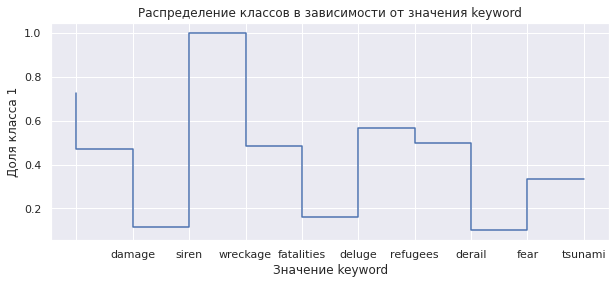

In [20]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
x = data_1['keyword'].tolist()
y = y

plt.step(x, y)
plt.xlabel('Значение keyword')
plt.ylabel('Доля класса 1')
plt.title('Распределение классов в зависимости от значения keyword')
plt.show()

Вывод: 
- у keyword значений ' ', wreckage, refuges доля класса 1 (в твите содержится информация о настоящей катастрофе) превышает 0,5;
- у keyword значений damage, siren, fatalities, deluge, fear, tsunami доля класса 1 (в твите содержится информация о настоящей катастрофе) меньше 0,5;
- у keyword значения derail доля 1 класса (в твите содержится информация о настоящей катастрофе) ровно 0,5.



## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [21]:
y_train = train['target']
train['main'] = train[train.columns[1:4]].apply(lambda x: ' '.join(x.dropna()), axis=1)
train = train.drop(['id', 'keyword', 'location', 'text', 'target'], axis=1)
train

,main
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
5461,police Houston CNN: Tennessee movie theater s...
5787,rioting Still rioting in a couple of hours le...
7445,wounds Lake Highlands Crack in the path where ...
...,...
5226,obliteration Merica! @Eganator2000 There aren'...
5390,panic just had a panic attack bc I don't have...
860,blood Omron HEM-712C Automatic Blood Pressure...
7603,Officials say a quarantine is in place at an...


In [22]:
y_test = test['target']
test['main'] = test[test.columns[1:4]].apply(lambda x: ' '.join(x.dropna()), axis=1)
test = test.drop(['id', 'keyword', 'location', 'text', 'target'], axis=1)
test

,main
2644,destruction So you have a new weapon that can...
2227,deluge The f$&amp;@ing things I do for #GISHW...
5448,police UK DT @georgegalloway: RT @Galloway4May...
132,aftershock Aftershock back to school kick off...
6845,"trauma Montgomery County, MD in response to tr..."
...,...
4307,"hellfire 570 Vanderbilt; Brooklyn, NY New cock..."
3375,evacuation USA Bend Post Office roofers cut ga...
1710,collided Monsoon flooding - Monsoon rains hav...
4898,massacre Ireland Remember this was a massacre ...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [23]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer = word_tokenize)
bow = vec.fit_transform(train.main)
bow.shape

(5329, 19676)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [25]:
list(vec.vocabulary_.items())

[('bridge', 6150),
 ('%', 3),
 ('20collapse', 4000),
 ('ashes', 5215),
 ('2015', 3971),
 (':', 4442),
 ('australia\x89ûªs', 5350),
 ('collapse', 7043),
 ('at', 5264),
 ('trent', 18184),
 ('among', 4929),
 ('worst', 19287),
 ('in', 10951),
 ('history', 10516),
 ('england', 8685),
 ('bundled', 6277),
 ('out', 14076),
 ('australia', 5346),
 ('for', 9398),
 ('60', 4276),
 ('...', 389),
 ('http', 10686),
 ('//t.co/t5trhjuau0', 2999),
 ('hail', 10164),
 ('carol', 6530),
 ('stream', 17162),
 (',', 336),
 ('illinois', 10894),
 ('great', 9999),
 ('michigan', 12895),
 ('technique', 17605),
 ('camp', 6431),
 ('b1g', 5424),
 ('thanks', 17722),
 ('to', 17977),
 ('@', 4453),
 ('bmurph1019', 5967),
 ('hail_youtsey', 10165),
 ('.', 386),
 ('termn8r13', 17667),
 ('#', 1),
 ('goblue', 9887),
 ('wrestleon', 19313),
 ('//t.co/oaskgki6qj', 2480),
 ('police', 14637),
 ('houston', 10664),
 ('cnn', 6983),
 ('tennessee', 17650),
 ('movie', 13222),
 ('theater', 17739),
 ('shooting', 16419),
 ('suspect', 17382),

In [26]:
from string import punctuation

In [27]:
def my_vectorizer(slovar):
  summa_1 = summa_2 = summa_3 = 0
  for i in slovar:
    if [s for s in i[0] if s in '1234567890']:
      summa_1 += 1
    for l in i[0]:
      if l in punctuation:
        summa_2 += 1
        break
    if i[0][0] == '#' or i[0][0] == '@':
      summa_3 += 1
  return summa_1, summa_2, summa_3

In [28]:
my_vectorizer(list(vec.vocabulary_.items()))

(4045, 5250, 2)

In [29]:
print(f'Все слова, которые содержат цифры: {my_vectorizer(list(vec.vocabulary_.items()))[0]}.')
print(f'Все слова, которые содержат символы пунктуации: {my_vectorizer(list(vec.vocabulary_.items()))[1]}.')
print(f'Количество хэштегов и упоминаний, которые остались в словаре: {my_vectorizer(list(vec.vocabulary_.items()))[2]}.')

Все слова, которые содержат цифры: 4045.
Все слова, которые содержат символы пунктуации: 5250.
Количество хэштегов и упоминаний, которые остались в словаре: 2.


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [30]:
from nltk.tokenize import TweetTokenizer
from nltk import tokenize
tweet = TweetTokenizer()

vec_2 = CountVectorizer(tokenizer=tweet.tokenize)
bow_2 = vec_2.fit_transform(train.main) 
bow_2.shape

(5329, 19668)

In [31]:
def my_vectorizer(slovar):
  summa_1 = summa_2 = summa_3 = 0
  for i in slovar:
    if [s for s in i[0] if s in '1234567890']:
      summa_1 += 1
    for l in i[0]:
      if l in punctuation:
        summa_2 += 1
        break
    if i[0][0] == '#' or i[0][0] == '@':
      summa_3 += 1
  return summa_1, summa_2, summa_3

In [ ]:
my_vectorizer(list(vec_2.vocabulary_.items()))

(3940, 7338, 3149)

In [32]:
print(f'Все слова, которые содержат цифры: {my_vectorizer(list(vec_2.vocabulary_.items()))[0]}.')
print(f'Все слова, которые содержат символы пунктуации: {my_vectorizer(list(vec_2.vocabulary_.items()))[1]}.')
print(f'Количество хэштегов и упоминаний, которые остались в словаре: {my_vectorizer(list(vec_2.vocabulary_.items()))[2]}.')

Все слова, которые содержат цифры: 3940.
Все слова, которые содержат символы пунктуации: 7338.
Количество хэштегов и упоминаний, которые остались в словаре: 3149.


Заметно увеличилось количество слов, содержащих символы пунктуации и хэштеги/упоминания, что неудивительно, так как tweet_tokenizer специально адаптирован под обработку твитов (сохраняет смайлики, хэштеги и т.д.)

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [33]:
from nltk.tokenize import TweetTokenizer
from nltk import tokenize
tweet = TweetTokenizer()

In [34]:
import re
from nltk.stem.snowball import SnowballStemmer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))


def customized_tokenizer(text):
    text = text.lower()
    text_stop = ' '.join(word for word in text.split() if word not in STOPWORDS)
    text_tags = re.findall(r'([#][a-z]+)', text)
    text_copy = text.split()
    for i in text_copy:
      if i[0] == '#':
        text_copy.remove(i)
    text_new = " ".join(text_copy)
    text_new_latin_and_smiles = re.findall(r'(\b[a-z]+)', text_new) + re.findall(r'[:;][-()]+', text_new) + re.findall(r'[-()][:;]+', text_new)
    text_final = text_tags + text_new_latin_and_smiles
    stemmer = SnowballStemmer('english')
    stemmed_example = [stemmer.stem(w) for w in text_final]
    text_final_final = ' '.join(stemmed_example)
    return text_final_final

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
mid_train = train[0:10]
mid_train['main'] = mid_train['main'].apply(customized_tokenizer)
mid_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,main
1186,bridg ash australia collaps at trent bridg amo...
4071,#goblu #wrestleon hail carol stream illinoi gr...
5461,polic houston cnn tennesse movi theater shoot ...
5787,riot still riot in a coupl of hour left until ...
7445,wound lake highland crack in the path where i ...
151,#mlb airplan somewher out there expert in fran...
915,bloodi isol citi in world perth i came to kill...
1305,burn johnsontionn except idk them it s realli ...
2570,destroy he him or she her ask destroy the hous
7399,wound maracay y nirgua venezuela polic offic w...


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [36]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, roc_auc_score

In [37]:
train['main_1'] = train['main'].apply(customized_tokenizer)
test['main_1'] = test['main'].apply(customized_tokenizer)

In [38]:
cnt_vec_3 = CountVectorizer() 
train_final = cnt_vec_3.fit_transform(train.main_1) 
test_final = cnt_vec_3.transform(test.main_1)

In [39]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(train_final, y_train)
pred = clf.predict(test_final)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1318
           1       0.79      0.73      0.76       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.80      2284
weighted avg       0.80      0.80      0.80      2284



## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize
tfidf_vec = TfidfVectorizer()

In [41]:
train['main_2'] = train['main'].apply(customized_tokenizer)
test['main_2'] = test['main'].apply(customized_tokenizer)

In [42]:
train_final_2 = tfidf_vec.fit_transform(train.main_2) 
test_final_2 = tfidf_vec.transform(test.main_2)

In [43]:
clf_2 = LogisticRegression(max_iter=200, random_state=42)
clf_2.fit(train_final_2, y_train)
pred_2 = clf_2.predict(test_final_2)
print(classification_report(y_test, pred)) # качество не изменилось

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1318
           1       0.79      0.73      0.76       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.80      2284
weighted avg       0.80      0.80      0.80      2284



In [44]:
tfidf_vec_2 = TfidfVectorizer(max_df = 0.9)
train_final_2_0 = tfidf_vec_2.fit_transform(train.main_2) 
test_final_2_0 = tfidf_vec_2.transform(test.main_2)
print(f'Размер предыдущей матрицы: {train_final_2.shape}')
print(f'Размер матрицы: {train_final_2_0.shape}')
print(f'Размер предыдущей матрицы: {test_final_2.shape}')
print(f'Размер матрицы: {test_final_2_0.shape}')

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(train_final_2_0, y_train)
pred = clf.predict(test_final_2_0) 
print(classification_report(y_test, pred)) # качество f1-меры улучшилось на 0 классе и при всзвешенном усреднении, precision стала чуть лучше, незначительно улучшилась усредненная полнота 

Размер предыдущей матрицы: (5329, 13741)
Размер матрицы: (5329, 13741)
Размер предыдущей матрицы: (2284, 13741)
Размер матрицы: (2284, 13741)
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1318
           1       0.81      0.72      0.76       966

    accuracy                           0.81      2284
   macro avg       0.81      0.80      0.80      2284
weighted avg       0.81      0.81      0.81      2284



In [45]:
def clean_words(text_3):
    text_copy = text_3.split()
    for i in text_copy:
      result = list(filter(lambda x: len(x) > 3 , text_copy)) 
    text_clean = " ".join(result)
    return text_clean

In [46]:
# 3 
train['main_3'] = train['main'].apply(customized_tokenizer)
test['main_3'] = test['main'].apply(customized_tokenizer)
train['main_3'] = train['main_3'].apply(clean_words)
test['main_3'] = test['main_3'].apply(clean_words)

In [47]:
train_final_3 = tfidf_vec.fit_transform(train.main_3) 
test_final_3 = tfidf_vec.transform(test.main_3)

In [48]:
clf_3 = LogisticRegression(max_iter=200, random_state=42)
clf_3.fit(train_final_3, y_train)
pred_3 = clf_3.predict(test_final_3)
print(classification_report(y_test, pred)) #качество не изменилось по сравнению с предыдущим случаем

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1318
           1       0.81      0.72      0.76       966

    accuracy                           0.81      2284
   macro avg       0.81      0.80      0.80      2284
weighted avg       0.81      0.81      0.81      2284



In [ ]:
print(f'Размер предыдущей матрицы: {train_final_2.shape}')
print(f'Размер матрицы: {train_final_3.shape}')
print(f'Размер предыдущей матрицы: {test_final_2.shape}')
print(f'Размер матрицы: {test_final_3.shape}') #видим, что новая матрица значительно уменьшилась

Размер предыдущей матрицы: (5329, 13741)
Размер матрицы: (5329, 12137)
Размер предыдущей матрицы: (2284, 13741)
Размер матрицы: (2284, 12137)


## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [49]:
from sklearn.feature_extraction.text import HashingVectorizer
from nltk import tokenize
hash_vec = HashingVectorizer(n_features = 5000)

In [50]:
train['main'] = train['main'].apply(customized_tokenizer)
test['main'] = test['main'].apply(customized_tokenizer)

In [51]:
train_final_3 = hash_vec.fit_transform(train.main) 
test_final_3 = hash_vec.transform(test.main)

In [52]:
clf_3 = LogisticRegression(max_iter=200, random_state=42)
clf_3.fit(train_final_3, y_train)
pred_3 = clf_3.predict(test_final_3)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1318
           1       0.81      0.72      0.76       966

    accuracy                           0.81      2284
   macro avg       0.81      0.80      0.80      2284
weighted avg       0.81      0.81      0.81      2284



Лучшее качество получилось при использовании таких векторайзеров, как HashingVectorizer и TfidfVectorizer с ограничениями по df.


## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.